# Spliting Data

In [1]:
##importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from numpy import median, mean
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

* Outlier =  1 normal
* Outlier = -1 anormal

### IMPORTING DATASETS

In [2]:
## importando dataset frequencia pivotado
df_freq = pd.read_csv('dataseteh/pp3/eh-frequencia_pp3.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq.shape)
df_freq.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,3.0,2.0,4.0,1.0,6.0,10.0
1,2,1,0,3.0,3.0,5.0,2.0,4.0,10.0
2,3,2,0,3.0,2.0,3.0,2.0,7.0,8.0
3,4,3,0,2.0,3.0,3.0,2.0,5.0,11.0
4,5,4,0,2.0,3.0,2.0,2.0,3.0,4.0


In [3]:
#importando dataset duracao pivotado
df_dur = pd.read_csv('dataseteh/pp3/eh-duracao_pp3.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur.shape)
df_dur.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,1319.0,4407.0,1600.0,2684.0,2840.0,2971.0
1,2,1,0,1242.0,7409.0,2122.0,4710.0,1937.0,2659.0
2,3,2,0,1513.0,3845.0,1157.0,6173.0,2800.0,2359.0
3,4,3,0,959.0,7010.0,1400.0,5820.0,2401.0,2862.0
4,5,4,0,947.0,8027.0,846.0,5823.0,1429.0,1066.0


In [4]:
#importando dataset duracao/frequencia pivotado
df_dfreq = pd.read_csv('dataseteh/pp3/eh-dfreq.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq.shape)
df_dfreq.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,439.666667,2203.500000,400.000000,2684.0,473.333333,297.100000
1,2,1,0,414.000000,2469.666667,424.400000,2355.0,484.250000,265.900000
2,3,2,0,504.333333,1922.500000,385.666667,3086.5,400.000000,294.875000
3,4,3,0,479.500000,2336.666667,466.666667,2910.0,480.200000,260.181818
4,5,4,0,473.500000,2675.666667,423.000000,2911.5,476.333333,266.500000


### Separating validation data - 84 days for DURATION, FREQUENCY and DURATION/FREQUENCY

In [5]:
#DURACAO
#validacao P1 semana 18 a semana 30 = 12semanas
df_dur_valid = df_dur.iloc[140:224].copy()
df_dur_valid.dia = df_dur_valid.dia - 140
print(df_dur_valid.shape)
df_dur_valid.reset_index(drop=True, inplace=True)
df_dur_valid.head()

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,1124.0,4254.0,1386.0,2419.0,3362.0,3019.0
1,2,1,0,811.0,7614.0,1069.0,4841.0,1341.0,2359.0
2,3,2,0,1160.0,7642.0,1426.0,5846.0,3842.0,3329.0
3,4,3,0,876.0,7297.0,1715.0,4003.0,2679.0,3664.0
4,5,4,0,691.0,3682.0,493.0,2896.0,1335.0,2097.0


In [6]:
#FREQUENCIA
#validacao P1 semana 18 a semana 30 = 12semanas
df_freq_valid = df_freq.iloc[140:224].copy()
df_freq_valid.dia = df_freq_valid.dia - 140
print(df_freq_valid.shape)
df_freq_valid.reset_index(drop=True, inplace=True)
df_freq_valid.head()

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,2.0,2.0,3.0,1.0,7.0,11.0
1,2,1,0,2.0,3.0,3.0,2.0,3.0,9.0
2,3,2,0,3.0,3.0,3.0,2.0,8.0,11.0
3,4,3,0,2.0,3.0,4.0,2.0,6.0,14.0
4,5,4,0,2.0,2.0,1.0,1.0,4.0,8.0


In [7]:
#DURACAO/FREQUENCIA
#validacao P1 semana 18 a semana 30 = 12semanas
df_dfreq_valid = df_dfreq.iloc[140:224].copy()
df_dfreq_valid.dia = df_dfreq_valid.dia - 140
print(df_dfreq_valid.shape)
df_dfreq_valid.reset_index(drop=True, inplace=True)
df_dfreq_valid.head()

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,562.000000,2127.000000,462.000000,2419.0,480.285714,274.454545
1,2,1,0,405.500000,2538.000000,356.333333,2420.5,447.000000,262.111111
2,3,2,0,386.666667,2547.333333,475.333333,2923.0,480.250000,302.636364
3,4,3,0,438.000000,2432.333333,428.750000,2001.5,446.500000,261.714286
4,5,4,0,345.500000,1841.000000,493.000000,2896.0,333.750000,262.125000


In [8]:
#exportando os dataset
df_dur_valid.to_csv(r'dataseteh/pp4/eh-duracao-valid84.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_freq_valid.to_csv(r'dataseteh/pp4/eh-frequencia-valid84.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_dfreq_valid.to_csv(r'dataseteh/pp4/eh-dfreq-valid84.csv', sep=';', index=False, decimal=',')

### Adding outlier to test data

In [9]:
# DURACAO TESTE

In [10]:
df_dur_test = df_dur.iloc[140:224].copy()
df_dur_test.dia = df_dur_test.dia - 140
print(df_dur_test.shape)
df_dur_test.reset_index(drop=True, inplace=True)
df_dur_test.head()
#adicionando colunas
df_dur_test['var_cclothes'] = 1
df_dur_test['var_eating'] = 1
df_dur_test['var_mcoffe'] = 1
df_dur_test['var_mhotfood'] = 1
df_dur_test['var_toileting'] = 1
df_dur_test['var_whandface'] = 1
df_dur_test['outlier'] = 1
df_dur_test.head(2)

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,1124.0,4254.0,1386.0,2419.0,3362.0,3019.0,1,1,1,1,1,1,1
1,2,1,0,811.0,7614.0,1069.0,4841.0,1341.0,2359.0,1,1,1,1,1,1,1


In [11]:
# FREQUENCIA TESTE

In [12]:
df_freq_test = df_freq.iloc[140:224].copy()
df_freq_test.dia = df_freq_test.dia - 140
print(df_freq_test.shape)
df_freq_test.reset_index(drop=True, inplace=True)
df_freq_test.head()
#adicionando colunas
df_freq_test['var_cclothes'] = 1
df_freq_test['var_eating'] = 1
df_freq_test['var_mcoffe'] = 1
df_freq_test['var_mhotfood'] = 1
df_freq_test['var_toileting'] = 1
df_freq_test['var_whandface'] = 1
df_freq_test['outlier'] = 1
df_freq_test.head(2)

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,2.0,2.0,3.0,1.0,7.0,11.0,1,1,1,1,1,1,1
1,2,1,0,2.0,3.0,3.0,2.0,3.0,9.0,1,1,1,1,1,1,1


In [13]:
#DFREQ TEST

In [14]:
df_dfreq_test = df_dfreq.iloc[140:224].copy()
df_dfreq_test.dia = df_dfreq_test.dia - 140
print(df_dfreq_test.shape)
df_dfreq_test.reset_index(drop=True, inplace=True)
df_dfreq_test.head()
#adicionando colunas
df_dfreq_test['var_cclothes'] = 1
df_dfreq_test['var_eating'] = 1
df_dfreq_test['var_mcoffe'] = 1
df_dfreq_test['var_mhotfood'] = 1
df_dfreq_test['var_toileting'] = 1
df_dfreq_test['var_whandface'] = 1
df_dfreq_test['outlier'] = 1
df_dfreq_test.head(2)

(84, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,562.0,2127.0,462.000000,2419.0,480.285714,274.454545,1,1,1,1,1,1,1
1,2,1,0,405.5,2538.0,356.333333,2420.5,447.000000,262.111111,1,1,1,1,1,1,1


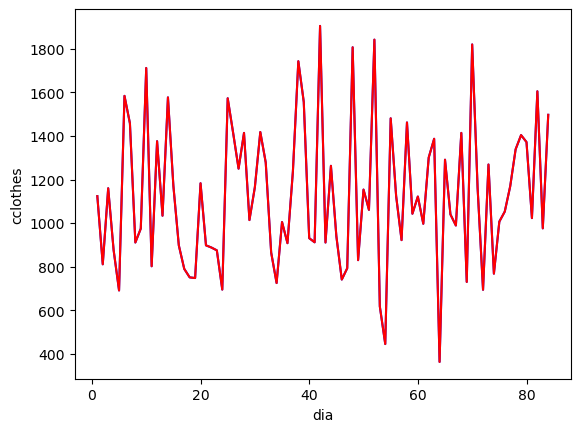

In [15]:
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test, color='red')

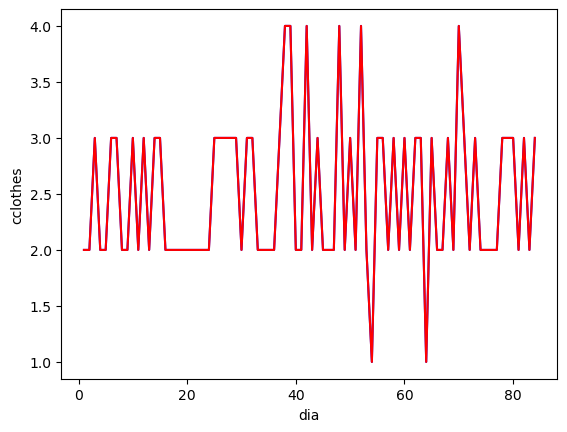

In [16]:
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test, color='red')

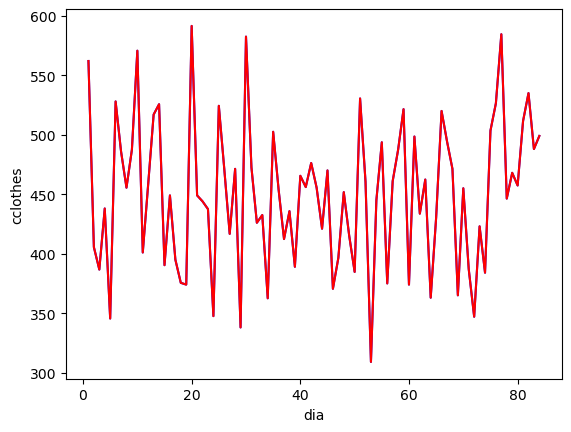

In [17]:
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test, color='red')

In [18]:
# SEPARANDO PARTE PARA ADD OUTLIERS

In [19]:
df_dur_testA = df_dur_test.iloc[0:42].copy()
print(df_dur_testA.shape)
df_dur_testC = df_dur_test.iloc[42:94].copy()
print(df_dur_testC.shape)

(42, 16)
(42, 16)


In [20]:
df_freq_testA = df_freq_test.iloc[0:42].copy()
print(df_freq_testA.shape)
df_freq_testC = df_freq_test.iloc[42:94].copy()
print(df_freq_testC.shape)

(42, 16)
(42, 16)


In [21]:
df_dfreq_testA = df_dfreq_test.iloc[0:42].copy()
print(df_dfreq_testA.shape)
df_dfreq_testC = df_dfreq_test.iloc[42:94].copy()
print(df_dfreq_testC.shape)

(42, 16)
(42, 16)


In [22]:
# adição de anomalias aos dados de teste
ac_va = 20
ac_vb = 60
for ind in df_dur_testA.index:
    xx = random.randint(2,6) #escolhe o no. de colunas que serão modificadas
    lista = random.sample(['cclothes','eating','mcoffe','mhotfood','toileting','whandface'], k=xx) 
                        #seleciona randomicamente as colunas a serem modificadas
    for item in enumerate(lista): #percorre a lista de atividades selecionadas
        x1 = random.randint(ac_va,ac_vb) #percetual de aumento
        updown = random.randint(1,2) # 1 acrescimo no valor, 2 decrescimo no valor
        coluna = item[1] #coluna a ser modificada
        #armazena valores atuais
        valor_atual_freq = df_freq_testA[coluna][ind] #para frequencia
        valor_atual_dur = df_dur_testA[coluna][ind] #para duração
        #reseta variavesi temporarias
        novo_valor_dfreq = 0
        novo_valor_dur = 0
        novo_valor_freq = 0
        #aplica variações
        if (valor_atual_freq > 2): #caso frequencia maior q 2
            if (updown == 1): #caso selecionado acrescimo
                novo_valor_freq = df_freq_testA[coluna][ind] + ((df_freq_testA[coluna][ind] * x1)/100)
                novo_valor_dur  = df_dur_testA[coluna][ind]  - ((df_dur_testA[coluna][ind]  * x1)/100)
                novo_valor_dfreq = novo_valor_dur / novo_valor_freq
            else: #caso selecionado decrescimo
                novo_valor_freq = df_freq_testA[coluna][ind] - ((df_freq_testA[coluna][ind] * x1)/100)
                if novo_valor_freq < 1: #se frequencia negativa ou zero/arredodara para zero
                    novo_valor_freq = 1
                novo_valor_dur  = df_dur_testA[coluna][ind]  + ((df_dur_testA[coluna][ind]  * x1)/100)
                novo_valor_dfreq = novo_valor_dur / novo_valor_freq #atualiza valor duração/frequência
        else: #caso frequencia menor que 2 aplica sempre acrescimo
            novo_valor_freq = df_freq_testA[coluna][ind] + ((df_freq_testA[coluna][ind] * x1)/100)
            novo_valor_dur  = df_dur_testA[coluna][ind]  - ((df_dur_testA[coluna][ind]  * x1)/100)
            novo_valor_dfreq = novo_valor_dur / novo_valor_freq
        #ajustando tipos para inteiro
        novo_valor_dur = int(novo_valor_dur)
        novo_valor_freq = int(novo_valor_freq)
        novo_valor_dfreq = int(novo_valor_dfreq)
        
        var = 'var_'+coluna
        
        df_freq_testA[coluna][ind] = novo_valor_freq
        df_freq_testA[var][ind] = -1
        df_freq_testA['outlier'][ind] = -1        
        
        df_dur_testA[coluna][ind] = novo_valor_dur
        df_dur_testA[var][ind] = -1
        df_dur_testA['outlier'][ind] = -1        
        
        df_dfreq_testA[coluna][ind] = novo_valor_dfreq
        df_dfreq_testA[var][ind] = -1
        df_dfreq_testA['outlier'][ind] = -1


C:\Users\mauri\AppData\Local\Temp\ipykernel_22248\959755544.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_testA[coluna][ind] = novo_valor_freq
C:\Users\mauri\AppData\Local\Temp\ipykernel_22248\959755544.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_testA[var][ind] = -1
C:\Users\mauri\AppData\Local\Temp\ipykernel_22248\959755544.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_testA['outlier'][i

In [23]:
# # acrescimo no valor
# ac_va = 20
# ac_vb = 60


# for ind in df_dur_testA.index:

#     xx = random.randint(2,8) #escolhe o no. de colunas que serão modificadas
#     print('\nNo colunas alteradas: ',xx)
#     lista = random.sample(['cclothes','eating','mcoffe','mhotfood','sleep','toileting','whandface','watchtv'], k=xx) #seleciona randomicamente as colunas a serem modificadas
    
#     for item in enumerate(lista):

        
#         x1 = random.randint(ac_va,ac_vb) #percetual de aumento
#         updown = random.randint(1,2) # 1 acrescimo no valor, 2 decrescimo no valor
#         coluna = item[1] #coluna a ser modificada

#         print('\nColuna: ',coluna)
#         print('Fator aumento: ',x1)
#         print('Fator decresc: ',x2)
#         print('Fator freq au: ',x3)
#         print('cima ou baixo: ',updown)

#         #armazena valor atual
#         valor_atual_freq = df_freq_testA[coluna][ind]
#         valor_atual_dur = df_dur_testA[coluna][ind]

#         novo_valor_dfreq = 0
#         novo_valor_dur = 0
#         novo_valor_freq = 0
        
#         #aplica variações
#         if (valor_atual_freq > 2):
#             if (updown == 1):
#                 novo_valor_freq = df_freq_testA[coluna][ind] + ((df_freq_testA[coluna][ind] * x1)/100)
#                 novo_valor_dur  = df_dur_testA[coluna][ind]  - ((df_dur_testA[coluna][ind]  * x1)/100)
#                 novo_valor_dfreq = novo_valor_dur / novo_valor_freq
#             else:
#                 novo_valor_freq = df_freq_testA[coluna][ind] - ((df_freq_testA[coluna][ind] * x1)/100)
#                 if novo_valor_freq < 1:
#                     novo_valor_freq = 1
#                 novo_valor_dur  = df_dur_testA[coluna][ind]  + ((df_dur_testA[coluna][ind]  * x1)/100)
#                 novo_valor_dfreq = novo_valor_dur / novo_valor_freq
#         else:
#             novo_valor_freq = df_freq_testA[coluna][ind] + ((df_freq_testA[coluna][ind] * x1)/100)
#             novo_valor_dur  = df_dur_testA[coluna][ind]  - ((df_dur_testA[coluna][ind]  * x1)/100)
#             novo_valor_dfreq = novo_valor_dur / novo_valor_freq


#         novo_valor_dur = int(novo_valor_dur)
#         novo_valor_freq = int(novo_valor_freq)
#         novo_valor_dfreq = int(novo_valor_dfreq)
#         var = 'var_'+coluna
        
#         df_freq_testA[coluna][ind] = novo_valor_freq
#         df_freq_testA[var][ind] = -1
#         df_freq_testA['outlier'][ind] = -1        
        
#         df_dur_testA[coluna][ind] = novo_valor_dur
#         df_dur_testA[var][ind] = -1
#         df_dur_testA['outlier'][ind] = -1        
        
#         df_dfreq_testA[coluna][ind] = novo_valor_dfreq
#         df_dfreq_testA[var][ind] = -1
#         df_dfreq_testA['outlier'][ind] = -1

        
        
#         #printando valores
#         print('Atividade: ',coluna)
#         print('Valor atual  dur: ',valor_atual_dur)
#         print('Novo valor   dur: ',novo_valor_dur)
#         print('Valor atual freq: ',valor_atual_freq)
#         print('Novo valor  freq: ',novo_valor_freq)           

In [24]:
df_dur_test = pd.concat([df_dur_testA, df_dur_testC],ignore_index=True)
print(df_dur_test.shape)
df_dur_test.head(50)

(84, 16)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,1124.0,3318.0,928.0,1596.0,4942.0,3019.0,1,-1,-1,-1,-1,1,-1
1,2,1,0,811.0,7614.0,1069.0,4841.0,1622.0,3137.0,1,1,1,1,-1,-1,-1
2,3,2,0,1160.0,7642.0,1083.0,5846.0,3842.0,2097.0,1,1,-1,1,1,-1,-1
3,4,3,0,876.0,9777.0,2178.0,2601.0,3429.0,2564.0,1,-1,-1,-1,-1,-1,-1
4,5,4,0,490.0,2651.0,374.0,2896.0,827.0,2097.0,-1,-1,-1,1,-1,1,-1
5,6,5,1,1077.0,12687.0,2666.0,4938.0,4216.0,2647.0,-1,-1,-1,-1,-1,1,-1
6,7,6,1,2230.0,7144.0,834.0,2961.0,3070.0,2034.0,-1,1,1,-1,1,1,-1
7,8,0,0,464.0,10500.0,2299.0,4077.0,4397.0,1291.0,-1,-1,-1,-1,-1,-1,-1
8,9,1,0,975.0,5026.0,1803.0,5113.0,804.0,2653.0,1,-1,-1,1,-1,1,-1
9,10,2,0,719.0,8454.0,1342.0,2655.0,1064.0,2616.0,-1,1,1,-1,-1,1,-1


In [25]:
df_freq_test = pd.concat([df_freq_testA, df_freq_testC],ignore_index=True)
print(df_freq_test.shape)
df_freq_test.head(50)

(84, 16)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,2.0,2.0,3.0,1.0,3.0,11.0,1,-1,-1,-1,-1,1,-1
1,2,1,0,2.0,3.0,3.0,2.0,2.0,6.0,1,1,1,1,-1,-1,-1
2,3,2,0,3.0,3.0,3.0,2.0,8.0,15.0,1,1,-1,1,1,-1,-1
3,4,3,0,2.0,1.0,2.0,2.0,4.0,18.0,1,-1,-1,-1,-1,-1,-1
4,5,4,0,2.0,2.0,1.0,1.0,5.0,8.0,-1,-1,-1,1,-1,1,-1
5,6,5,1,3.0,1.0,3.0,2.0,3.0,9.0,-1,-1,-1,-1,-1,1,-1
6,7,6,1,1.0,3.0,2.0,2.0,6.0,8.0,-1,1,1,-1,1,1,-1
7,8,0,0,2.0,1.0,1.0,2.0,3.0,17.0,-1,-1,-1,-1,-1,-1,-1
8,9,1,0,2.0,4.0,1.0,2.0,6.0,10.0,1,-1,-1,1,-1,1,-1
9,10,2,0,4.0,3.0,3.0,2.0,9.0,9.0,-1,1,1,-1,-1,1,-1


In [26]:
df_dfreq_test = pd.concat([df_dfreq_testA, df_dfreq_testC],ignore_index=True)
print(df_dfreq_test.shape)
df_dfreq_test.head(50)

(84, 16)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,562.000000,1359.000000,232.000000,1191.0,1332.000000,274.454545,1,-1,-1,-1,-1,1,-1
1,2,1,0,405.500000,2538.000000,356.333333,2420.5,684.000000,520.000000,1,1,1,1,-1,-1,-1
2,3,2,0,386.666667,2547.333333,291.000000,2923.0,480.250000,139.000000,1,1,-1,1,1,-1,-1
3,4,3,0,438.000000,4938.000000,745.000000,963.0,793.000000,140.000000,1,-1,-1,-1,-1,-1,-1
4,5,4,0,190.000000,1035.000000,302.000000,2896.0,149.000000,262.125000,-1,-1,-1,1,-1,1,-1
5,6,5,1,272.000000,8458.000000,833.000000,2007.0,1171.000000,294.111111,-1,-1,-1,-1,-1,1,-1
6,7,6,1,1582.000000,2381.333333,417.000000,1080.0,511.666667,254.250000,-1,1,1,-1,1,1,-1
7,8,0,0,155.000000,5932.000000,1630.000000,1657.0,1395.000000,74.000000,-1,-1,-1,-1,-1,-1,-1
8,9,1,0,487.500000,1223.000000,1018.000000,2556.5,134.000000,265.300000,1,-1,-1,1,-1,1,-1
9,10,2,0,151.000000,2818.000000,447.333333,962.0,112.000000,290.666667,-1,1,1,-1,-1,1,-1


In [27]:
# GRAFICOS PARA OUTLIERS VALID X TEST

In [28]:
# cclothes

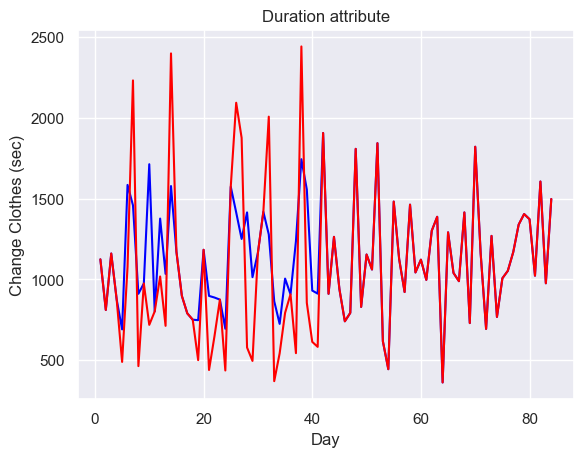

In [29]:
sns.set(font_scale=1)
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test, color='red')
ax.set(xlabel ="Day", ylabel = "Change Clothes (sec)", title ='Duration attribute')
plt.savefig('cclothes-duracao.svg')

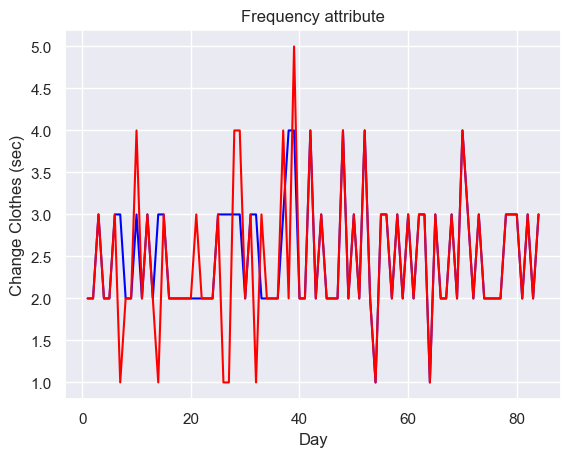

In [30]:
sns.set(font_scale=1)
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test, color='red')
ax.set(xlabel ="Day", ylabel = "Change Clothes (sec)", title ='Frequency attribute')
plt.savefig('cclothes-frequencia.svg')

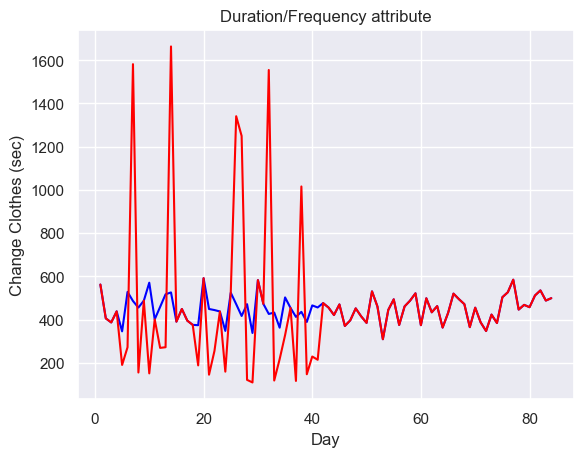

In [31]:
sns.set(font_scale=1)
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test, color='red')
ax.set(xlabel ="Day", ylabel = "Change Clothes (sec)", title ='Duration/Frequency attribute')
plt.savefig('cclothes-dfreq.svg')

In [32]:
# eating

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Eating (sec)'),
 Text(0.5, 1.0, 'Duration attribute')]

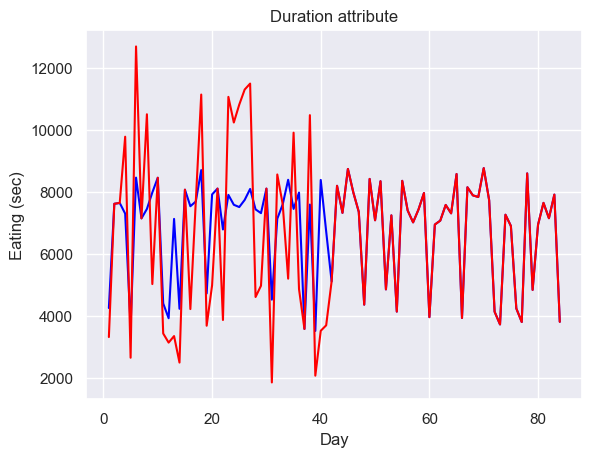

In [33]:
ax = sns.lineplot(x="dia", y="eating", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test, color='red')
ax.set(xlabel ="Day", ylabel = "Eating (sec)", title ='Duration attribute')
#plt.savefig('cclothes-dfreq.svg')

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Eating'),
 Text(0.5, 1.0, 'Frequency attribute')]

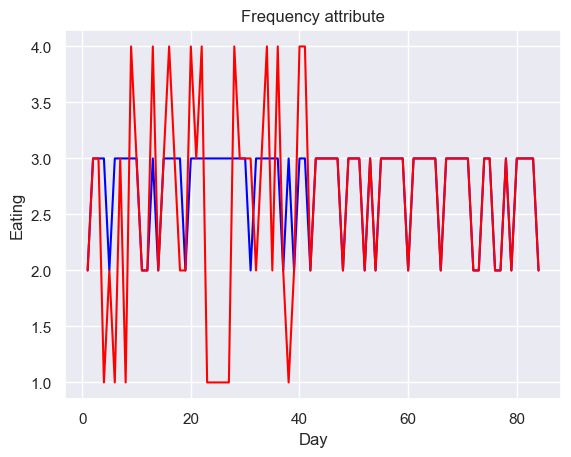

In [34]:
ax = sns.lineplot(x="dia", y="eating", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test, color='red')
ax.set(xlabel ="Day", ylabel = "Eating", title ='Frequency attribute')
#plt.savefig('cclothes-dfreq.svg')

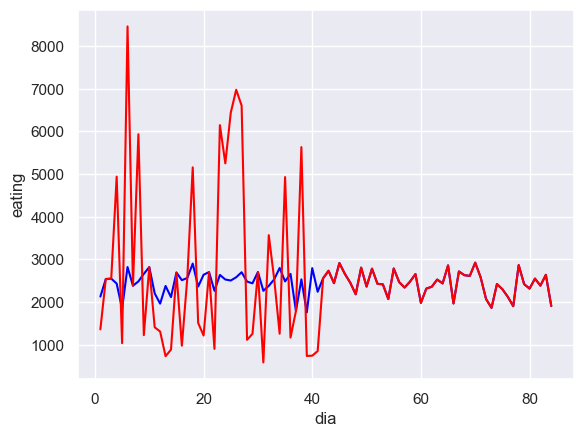

In [35]:
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test, color='red')

In [36]:
# mcoffe

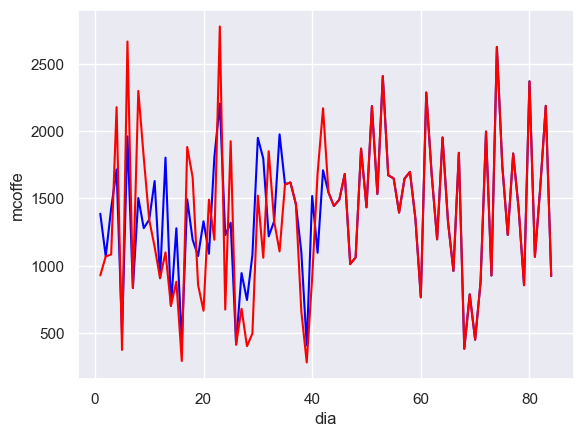

In [37]:
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test, color='red')

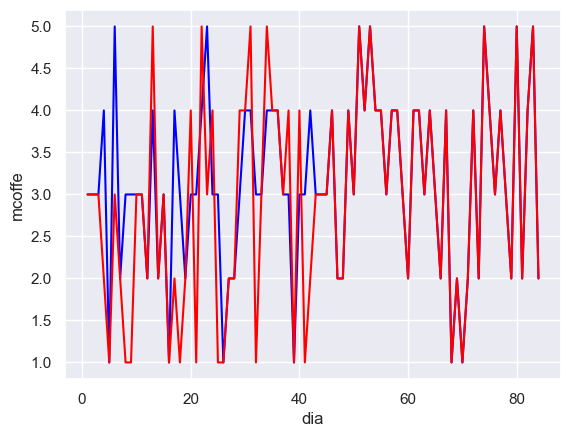

In [38]:
ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test, color='red')

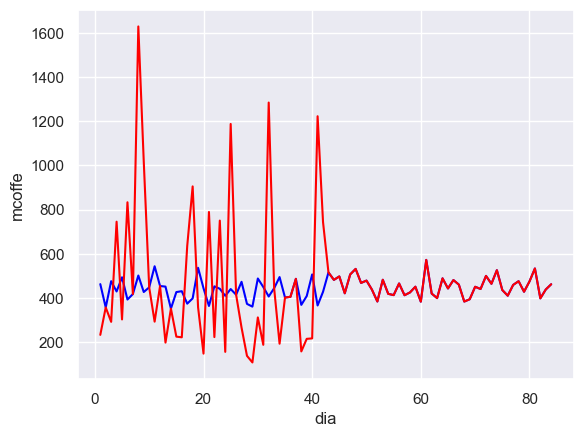

In [39]:
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test, color='red')

In [40]:
# mhotfood

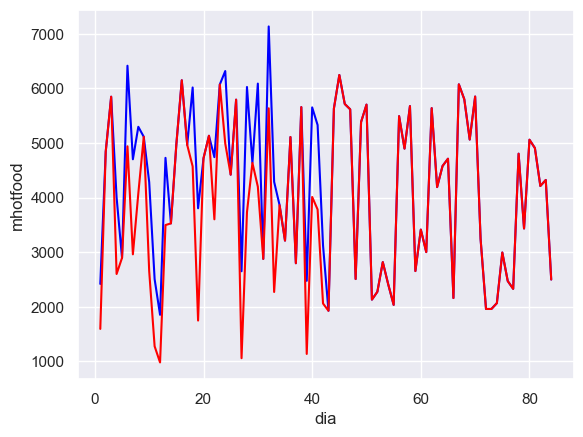

In [41]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test, color='red')

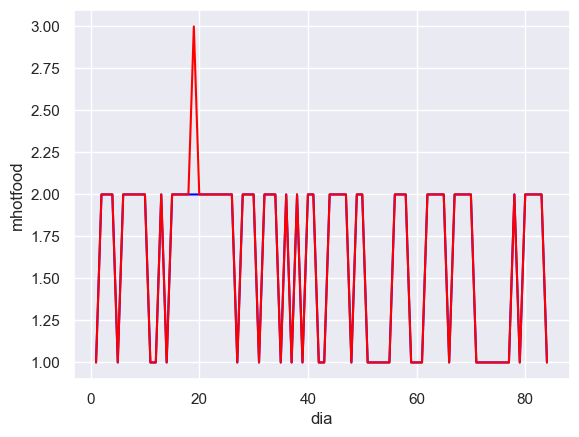

In [42]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test, color='red')

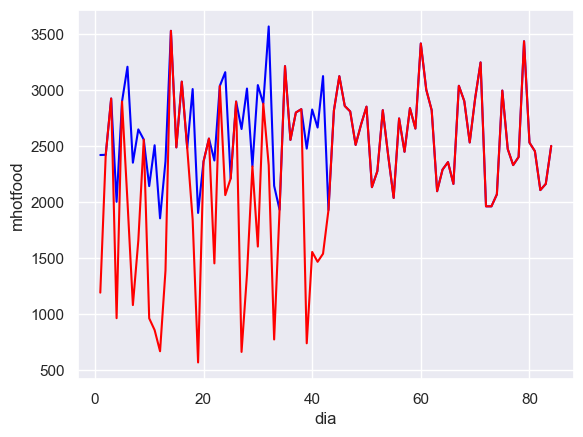

In [43]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test, color='red')

In [44]:
# toileting

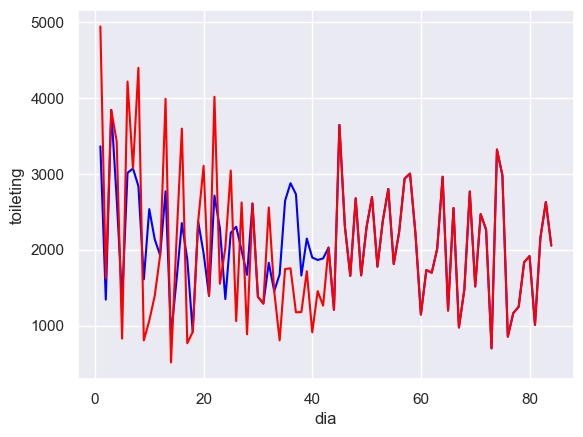

In [45]:
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test, color='red')

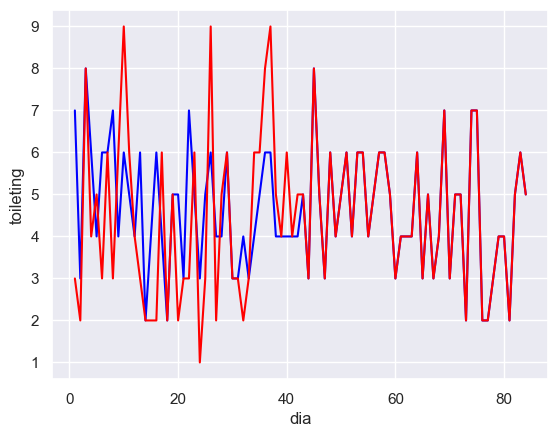

In [46]:
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test, color='red')

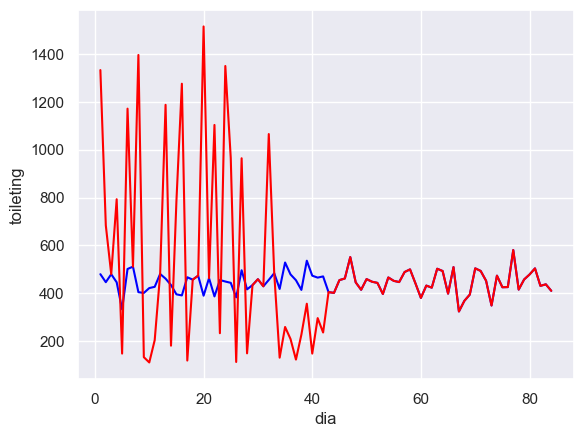

In [47]:
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test, color='red')

In [48]:
# whandface

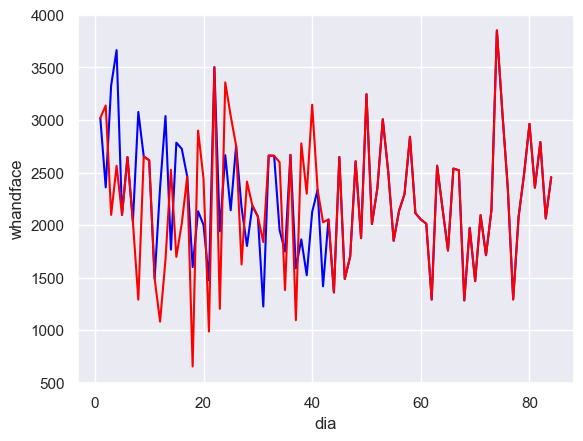

In [49]:
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_valid, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test, color='red')

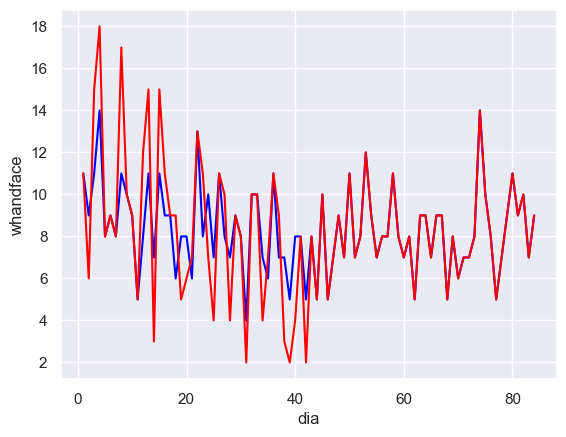

In [50]:
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_valid, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test, color='red')

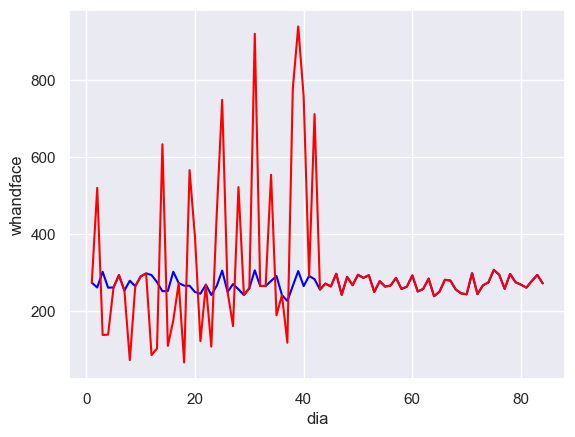

In [51]:
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_valid, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test, color='red')

In [52]:
#exportando os dataset
df_dur_test.to_csv(r'dataseteh/pp4/eh-duracao-test84.csv', sep=';', index=False, decimal=',')

df_freq_test.to_csv(r'dataseteh/pp4/eh-frequencia-test84.csv', sep=';', index=False, decimal=',')

df_dfreq_test.to_csv(r'dataseteh/pp4/eh-dfreq-test84.csv', sep=';', index=False, decimal=',')

In [53]:
#exportando os dataset
df_dur.to_csv(r'dataseteh/pp4/eh-duracao-trein.csv', sep=';', index=False, decimal=',')

df_freq.to_csv(r'dataseteh/pp4/eh-frequencia-trein.csv', sep=';', index=False, decimal=',')

df_dfreq.to_csv(r'dataseteh/pp4/eh-dfreq-trein.csv', sep=';', index=False, decimal=',')

In [54]:
df_dfreq_test.head(50)

,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier
0,1,0,0,562.000000,1359.000000,232.000000,1191.0,1332.000000,274.454545,1,-1,-1,-1,-1,1,-1
1,2,1,0,405.500000,2538.000000,356.333333,2420.5,684.000000,520.000000,1,1,1,1,-1,-1,-1
2,3,2,0,386.666667,2547.333333,291.000000,2923.0,480.250000,139.000000,1,1,-1,1,1,-1,-1
3,4,3,0,438.000000,4938.000000,745.000000,963.0,793.000000,140.000000,1,-1,-1,-1,-1,-1,-1
4,5,4,0,190.000000,1035.000000,302.000000,2896.0,149.000000,262.125000,-1,-1,-1,1,-1,1,-1
5,6,5,1,272.000000,8458.000000,833.000000,2007.0,1171.000000,294.111111,-1,-1,-1,-1,-1,1,-1
6,7,6,1,1582.000000,2381.333333,417.000000,1080.0,511.666667,254.250000,-1,1,1,-1,1,1,-1
7,8,0,0,155.000000,5932.000000,1630.000000,1657.0,1395.000000,74.000000,-1,-1,-1,-1,-1,-1,-1
8,9,1,0,487.500000,1223.000000,1018.000000,2556.5,134.000000,265.300000,1,-1,-1,1,-1,1,-1
9,10,2,0,151.000000,2818.000000,447.333333,962.0,112.000000,290.666667,-1,1,1,-1,-1,1,-1


## Sepearando atividades individuais

In [55]:
#imp os dataset
df_dur = pd.read_csv(r'dataseteh/pp4/eh-duracao-trein.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')

df_freq = pd.read_csv(r'dataseteh/pp4/eh-frequencia-trein.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')

df_dfreq = pd.read_csv(r'dataseteh/pp4/eh-dfreq-trein.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')


#imp os dataset
df_dur_test = pd.read_csv(r'dataseteh/pp4/eh-duracao-test84.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')

df_freq_test = pd.read_csv(r'dataseteh/pp4/eh-frequencia-test84.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')

df_dfreq_test = pd.read_csv(r'dataseteh/pp4/eh-dfreq-test84.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')

In [56]:
# atividadde 'cclothes'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_cclothes_trein = pd.DataFrame()
df_cclothes_trein['dia'] = df_dur['dia']
df_cclothes_trein['dia_semana'] = df_dur['dia_semana']
df_cclothes_trein['fim_semana'] = df_dur['fim_semana']
df_cclothes_trein['duracao'] = df_dur['cclothes']
df_cclothes_trein['frequencia'] = df_freq['cclothes']
df_cclothes_trein['durfreq'] = df_dfreq['cclothes']
df_cclothes_trein['outlier'] = 1
print(df_cclothes_trein.shape)
df_cclothes_trein.head()

#dados validação
df_cclothes_valid = df_cclothes_trein.iloc[140:224].copy()
df_cclothes_valid.dia = df_cclothes_valid.dia - 140
print(df_cclothes_valid.shape)
df_cclothes_valid.reset_index(drop=True, inplace=True)
df_cclothes_valid.head()

# #dados teste
# create an Empty DataFrame object
df_cclothes_test = pd.DataFrame()
df_cclothes_test['dia'] = df_dur_test['dia']
df_cclothes_test['dia_semana'] = df_dur_test['dia_semana']
df_cclothes_test['fim_semana'] = df_dur_test['fim_semana']
df_cclothes_test['duracao'] = df_dur_test['cclothes']
df_cclothes_test['frequencia'] = df_freq_test['cclothes']
df_cclothes_test['durfreq'] = df_dfreq_test['cclothes']
df_cclothes_test['outlier'] = np.where(((df_dur_test['var_cclothes'] == -1) | (df_freq_test['var_cclothes'] == -1) | (df_dfreq_test['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test.shape)
df_cclothes_test.head(50)

#exportando os dataset
df_cclothes_trein.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-treinfull.csv', sep=';', index=False, decimal=',')
df_cclothes_valid.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-valid84.csv', sep=';', index=False, decimal=',')
df_cclothes_test.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-test84.csv', sep=';', index=False, decimal=',')

df_cclothes_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,1124.0,2.0,562.000000,1
1,2,1,0,811.0,2.0,405.500000,1
2,3,2,0,1160.0,3.0,386.666667,1
3,4,3,0,876.0,2.0,438.000000,1
4,5,4,0,490.0,2.0,190.000000,-1
5,6,5,1,1077.0,3.0,272.000000,-1
6,7,6,1,2230.0,1.0,1582.000000,-1
7,8,0,0,464.0,2.0,155.000000,-1
8,9,1,0,975.0,2.0,487.500000,1
9,10,2,0,719.0,4.0,151.000000,-1


In [57]:
df_cclothes_trein.head()

,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,1319.0,3.0,439.666667,1
1,2,1,0,1242.0,3.0,414.000000,1
2,3,2,0,1513.0,3.0,504.333333,1
3,4,3,0,959.0,2.0,479.500000,1
4,5,4,0,947.0,2.0,473.500000,1


In [58]:
dfprev = df_cclothes_trein.copy()

dfprev = df_cclothes_trein.rename(columns={df_cclothes_trein.columns[0]: 'day', df_cclothes_trein.columns[1]: 'day_of_week',
                                           df_cclothes_trein.columns[2]: 'weekend'})
dfprev.head()

,day,day_of_week,weekend,duracao,frequencia,durfreq,outlier
0,1,0,0,1319.0,3.0,439.666667,1
1,2,1,0,1242.0,3.0,414.000000,1
2,3,2,0,1513.0,3.0,504.333333,1
3,4,3,0,959.0,2.0,479.500000,1
4,5,4,0,947.0,2.0,473.500000,1


In [59]:
# atividadde 'Eating'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_eating_trein = pd.DataFrame()
df_eating_trein['dia'] = df_dur['dia']
df_eating_trein['dia_semana'] = df_dur['dia_semana']
df_eating_trein['fim_semana'] = df_dur['fim_semana']
df_eating_trein['duracao'] = df_dur['eating']
df_eating_trein['frequencia'] = df_freq['eating']
df_eating_trein['durfreq'] = df_dfreq['eating']
df_eating_trein['outlier'] = 1
print(df_eating_trein.shape)
df_eating_trein.head()

#dados validação
df_eating_valid = df_eating_trein.iloc[140:224].copy()
df_eating_valid.dia = df_eating_valid.dia - 140
print(df_eating_valid.shape)
df_eating_valid.reset_index(drop=True, inplace=True)
df_eating_valid.head()

# #dados teste
# create an Empty DataFrame object
df_eating_test = pd.DataFrame()
df_eating_test['dia'] = df_dur_test['dia']
df_eating_test['dia_semana'] = df_dur_test['dia_semana']
df_eating_test['fim_semana'] = df_dur_test['fim_semana']
df_eating_test['duracao'] = df_dur_test['eating']
df_eating_test['frequencia'] = df_freq_test['eating']
df_eating_test['durfreq'] = df_dfreq_test['eating']
df_eating_test['outlier'] = np.where(((df_dur_test['var_eating'] == -1) | (df_freq_test['var_eating'] == -1) | (df_dfreq_test['var_eating'] == -1)), -1, 1)
print(df_eating_test.shape)
df_eating_test.head(50)

#exportando os dataset
df_eating_trein.to_csv(r'dataseteh/pp4/eh-ativ-eating-treinfull.csv', sep=';', index=False, decimal=',')
df_eating_valid.to_csv(r'dataseteh/pp4/eh-ativ-eating-valid84.csv', sep=';', index=False, decimal=',')
df_eating_test.to_csv(r'dataseteh/pp4/eh-ativ-eating-test84.csv', sep=';', index=False, decimal=',')

df_eating_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,3318.0,2.0,1359.000000,-1
1,2,1,0,7614.0,3.0,2538.000000,1
2,3,2,0,7642.0,3.0,2547.333333,1
3,4,3,0,9777.0,1.0,4938.000000,-1
4,5,4,0,2651.0,2.0,1035.000000,-1
5,6,5,1,12687.0,1.0,8458.000000,-1
6,7,6,1,7144.0,3.0,2381.333333,1
7,8,0,0,10500.0,1.0,5932.000000,-1
8,9,1,0,5026.0,4.0,1223.000000,-1
9,10,2,0,8454.0,3.0,2818.000000,1


In [60]:
# atividadde 'mcoffe'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_mcoffe_trein = pd.DataFrame()
df_mcoffe_trein['dia'] = df_dur['dia']
df_mcoffe_trein['dia_semana'] = df_dur['dia_semana']
df_mcoffe_trein['fim_semana'] = df_dur['fim_semana']
df_mcoffe_trein['duracao'] = df_dur['mcoffe']
df_mcoffe_trein['frequencia'] = df_freq['mcoffe']
df_mcoffe_trein['durfreq'] = df_dfreq['mcoffe']
df_mcoffe_trein['outlier'] = 1
print(df_mcoffe_trein.shape)
df_mcoffe_trein.head()

#dados validação
df_mcoffe_valid = df_mcoffe_trein.iloc[140:224].copy()
df_mcoffe_valid.dia = df_mcoffe_valid.dia - 140
print(df_mcoffe_valid.shape)
df_mcoffe_valid.reset_index(drop=True, inplace=True)
df_mcoffe_valid.head()

# #dados teste
# create an Empty DataFrame object
df_mcoffe_test = pd.DataFrame()
df_mcoffe_test['dia'] = df_dur_test['dia']
df_mcoffe_test['dia_semana'] = df_dur_test['dia_semana']
df_mcoffe_test['fim_semana'] = df_dur_test['fim_semana']
df_mcoffe_test['duracao'] = df_dur_test['mcoffe']
df_mcoffe_test['frequencia'] = df_freq_test['mcoffe']
df_mcoffe_test['durfreq'] = df_dfreq_test['mcoffe']
df_mcoffe_test['outlier'] = np.where(((df_dur_test['var_mcoffe'] == -1) | (df_freq_test['var_mcoffe'] == -1) | (df_dfreq_test['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test.shape)
df_mcoffe_test.head(50)

#exportando os dataset
df_mcoffe_trein.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-treinfull.csv', sep=';', index=False, decimal=',')
df_mcoffe_valid.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-valid84.csv', sep=';', index=False, decimal=',')
df_mcoffe_test.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-test84.csv', sep=';', index=False, decimal=',')

df_mcoffe_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,928.0,3.0,232.000000,-1
1,2,1,0,1069.0,3.0,356.333333,1
2,3,2,0,1083.0,3.0,291.000000,-1
3,4,3,0,2178.0,2.0,745.000000,-1
4,5,4,0,374.0,1.0,302.000000,-1
5,6,5,1,2666.0,3.0,833.000000,-1
6,7,6,1,834.0,2.0,417.000000,1
7,8,0,0,2299.0,1.0,1630.000000,-1
8,9,1,0,1803.0,1.0,1018.000000,-1
9,10,2,0,1342.0,3.0,447.333333,1


In [61]:
# atividadde 'mhotfood'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_mhotfood_trein = pd.DataFrame()
df_mhotfood_trein['dia'] = df_dur['dia']
df_mhotfood_trein['dia_semana'] = df_dur['dia_semana']
df_mhotfood_trein['fim_semana'] = df_dur['fim_semana']
df_mhotfood_trein['duracao'] = df_dur['mhotfood']
df_mhotfood_trein['frequencia'] = df_freq['mhotfood']
df_mhotfood_trein['durfreq'] = df_dfreq['mhotfood']
df_mhotfood_trein['outlier'] = 1
print(df_mhotfood_trein.shape)
df_mhotfood_trein.head()

#dados validação
df_mhotfood_valid = df_mhotfood_trein.iloc[140:224].copy()
df_mhotfood_valid.dia = df_mhotfood_valid.dia - 140
print(df_mhotfood_valid.shape)
df_mhotfood_valid.reset_index(drop=True, inplace=True)
df_mhotfood_valid.head()

# #dados teste
# create an Empty DataFrame object
df_mhotfood_test = pd.DataFrame()
df_mhotfood_test['dia'] = df_dur_test['dia']
df_mhotfood_test['dia_semana'] = df_dur_test['dia_semana']
df_mhotfood_test['fim_semana'] = df_dur_test['fim_semana']
df_mhotfood_test['duracao'] = df_dur_test['mhotfood']
df_mhotfood_test['frequencia'] = df_freq_test['mhotfood']
df_mhotfood_test['durfreq'] = df_dfreq_test['mhotfood']
df_mhotfood_test['outlier'] = np.where(((df_dur_test['var_mhotfood'] == -1) | (df_freq_test['var_mhotfood'] == -1) | (df_dfreq_test['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test.shape)
df_mhotfood_test.head(50)

#exportando os dataset
df_mhotfood_trein.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-treinfull.csv', sep=';', index=False, decimal=',')
df_mhotfood_valid.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-valid84.csv', sep=';', index=False, decimal=',')
df_mhotfood_test.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-test84.csv', sep=';', index=False, decimal=',')

df_mhotfood_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,1596.0,1.0,1191.0,-1
1,2,1,0,4841.0,2.0,2420.5,1
2,3,2,0,5846.0,2.0,2923.0,1
3,4,3,0,2601.0,2.0,963.0,-1
4,5,4,0,2896.0,1.0,2896.0,1
5,6,5,1,4938.0,2.0,2007.0,-1
6,7,6,1,2961.0,2.0,1080.0,-1
7,8,0,0,4077.0,2.0,1657.0,-1
8,9,1,0,5113.0,2.0,2556.5,1
9,10,2,0,2655.0,2.0,962.0,-1


In [62]:
# atividadde 'toileting'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_toileting_trein = pd.DataFrame()
df_toileting_trein['dia'] = df_dur['dia']
df_toileting_trein['dia_semana'] = df_dur['dia_semana']
df_toileting_trein['fim_semana'] = df_dur['fim_semana']
df_toileting_trein['duracao'] = df_dur['toileting']
df_toileting_trein['frequencia'] = df_freq['toileting']
df_toileting_trein['durfreq'] = df_dfreq['toileting']
df_toileting_trein['outlier'] = 1
print(df_toileting_trein.shape)
df_toileting_trein.head()

#dados validação
df_toileting_valid = df_toileting_trein.iloc[140:224].copy()
df_toileting_valid.dia = df_toileting_valid.dia - 140
print(df_toileting_valid.shape)
df_toileting_valid.reset_index(drop=True, inplace=True)
df_toileting_valid.head()

# #dados teste
# create an Empty DataFrame object
df_toileting_test = pd.DataFrame()
df_toileting_test['dia'] = df_dur_test['dia']
df_toileting_test['dia_semana'] = df_dur_test['dia_semana']
df_toileting_test['fim_semana'] = df_dur_test['fim_semana']
df_toileting_test['duracao'] = df_dur_test['toileting']
df_toileting_test['frequencia'] = df_freq_test['toileting']
df_toileting_test['durfreq'] = df_dfreq_test['toileting']
df_toileting_test['outlier'] = np.where(((df_dur_test['var_toileting'] == -1) | (df_freq_test['var_toileting'] == -1) | (df_dfreq_test['var_toileting'] == -1)), -1, 1)
print(df_toileting_test.shape)
df_toileting_test.head(50)

#exportando os dataset
df_toileting_trein.to_csv(r'dataseteh/pp4/eh-ativ-toileting-treinfull.csv', sep=';', index=False, decimal=',')
df_toileting_valid.to_csv(r'dataseteh/pp4/eh-ativ-toileting-valid84.csv', sep=';', index=False, decimal=',')
df_toileting_test.to_csv(r'dataseteh/pp4/eh-ativ-toileting-test84.csv', sep=';', index=False, decimal=',')

df_toileting_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,4942.0,3.0,1332.000000,-1
1,2,1,0,1622.0,2.0,684.000000,-1
2,3,2,0,3842.0,8.0,480.250000,1
3,4,3,0,3429.0,4.0,793.000000,-1
4,5,4,0,827.0,5.0,149.000000,-1
5,6,5,1,4216.0,3.0,1171.000000,-1
6,7,6,1,3070.0,6.0,511.666667,1
7,8,0,0,4397.0,3.0,1395.000000,-1
8,9,1,0,804.0,6.0,134.000000,-1
9,10,2,0,1064.0,9.0,112.000000,-1


In [63]:
# atividadde 'whandface'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_whandface_trein = pd.DataFrame()
df_whandface_trein['dia'] = df_dur['dia']
df_whandface_trein['dia_semana'] = df_dur['dia_semana']
df_whandface_trein['fim_semana'] = df_dur['fim_semana']
df_whandface_trein['duracao'] = df_dur['whandface']
df_whandface_trein['frequencia'] = df_freq['whandface']
df_whandface_trein['durfreq'] = df_dfreq['whandface']
df_whandface_trein['outlier'] = 1
print(df_whandface_trein.shape)
df_whandface_trein.head()

#dados validação
df_whandface_valid = df_whandface_trein.iloc[140:224].copy()
df_whandface_valid.dia = df_whandface_valid.dia - 140
print(df_whandface_valid.shape)
df_whandface_valid.reset_index(drop=True, inplace=True)
df_whandface_valid.head()

# #dados teste
# create an Empty DataFrame object
df_whandface_test = pd.DataFrame()
df_whandface_test['dia'] = df_dur_test['dia']
df_whandface_test['dia_semana'] = df_dur_test['dia_semana']
df_whandface_test['fim_semana'] = df_dur_test['fim_semana']
df_whandface_test['duracao'] = df_dur_test['whandface']
df_whandface_test['frequencia'] = df_freq_test['whandface']
df_whandface_test['durfreq'] = df_dfreq_test['whandface']
df_whandface_test['outlier'] = np.where(((df_dur_test['var_whandface'] == -1) | (df_freq_test['var_whandface'] == -1) | (df_dfreq_test['var_whandface'] == -1)), -1, 1)
print(df_whandface_test.shape)
df_whandface_test.head(50)

#exportando os dataset
df_whandface_trein.to_csv(r'dataseteh/pp4/eh-ativ-whandface-treinfull.csv', sep=';', index=False, decimal=',')
df_whandface_valid.to_csv(r'dataseteh/pp4/eh-ativ-whandface-valid84.csv', sep=';', index=False, decimal=',')
df_whandface_test.to_csv(r'dataseteh/pp4/eh-ativ-whandface-test84.csv', sep=';', index=False, decimal=',')

df_whandface_test.head(50)

(366, 7)
(84, 7)
(84, 7)


,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,3019.0,11.0,274.454545,1
1,2,1,0,3137.0,6.0,520.000000,-1
2,3,2,0,2097.0,15.0,139.000000,-1
3,4,3,0,2564.0,18.0,140.000000,-1
4,5,4,0,2097.0,8.0,262.125000,1
5,6,5,1,2647.0,9.0,294.111111,1
6,7,6,1,2034.0,8.0,254.250000,1
7,8,0,0,1291.0,17.0,74.000000,-1
8,9,1,0,2653.0,10.0,265.300000,1
9,10,2,0,2616.0,9.0,290.666667,1


In [64]:
print('DONE')

DONE
